# Deconvolution for layer visualisation

Investigate deconvnets. Initially, we are copying an example that uses a VGG rather than a resnet. It is not currently clear what problems are associated with resnets, or if they can even be used for this.

This notebook reproduces the results of https://github.com/jalused/Deconvnet-keras/blob/master/Deconvnet-keras.py after converting to use TF2.2

In [1]:
%cd /home/jupyter/dev/tflow/deconvnet/Deconvnet-keras

/home/jupyter/dev/tflow/deconvnet/Deconvnet-keras


In [3]:
import os
import sys
sys.path.append(os.getcwd())
from Deconvnet import *
import matplotlib.pyplot as plt


Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
model = vgg16.VGG16(weights = 'imagenet', include_top = True)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
def main(image_path, layer_name, feature_to_visualize, visualize_mode='all'):

    #model = vgg16.VGG16(weights = 'imagenet', include_top = True)
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    if not layer_name in layer_dict:
        print('Wrong layer name')
        sys.exit()

    # Load data and preprocess
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    #img_array = np.transpose(img_array, (2, 0, 1))
    img_array = img_array[np.newaxis, :]
    img_array = img_array.astype(np.float)
    img_array = imagenet_utils.preprocess_input(img_array)
    
    deconv = visualize(model, img_array, 
            layer_name, feature_to_visualize, visualize_mode)
    
    return deconv

In [6]:
#%debug
result = main('./husky.jpg', 'block4_conv2', 46)

(1, 28, 28, 256) (1, 2, 2, 1) (1, 56, 56, 256)
(1, 56, 56, 128) (1, 2, 2, 1) (1, 112, 112, 128)
(1, 112, 112, 64) (1, 2, 2, 1) (1, 224, 224, 64)


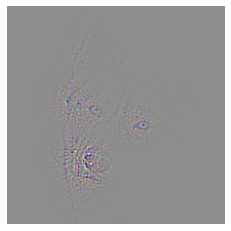

In [7]:
    # postprocess and save image
    #deconv = np.transpose(deconv, (1, 2, 0))
    deconv = result
    deconv = deconv - deconv.min()
    deconv *= 1.0 / (deconv.max() + 1e-8)
    deconv = deconv[:, :, ::-1]
    uint8_deconv = (deconv * 255).astype(np.uint8)
    img = Image.fromarray(uint8_deconv, 'RGB')
    #img.save('results/{}_{}_{}.png'.format(layer_name, feature_to_visualize, visualize_mode))
    plt.axis('off')
    #plt.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
    plt.imshow(img)

In [8]:
def show_result(deconv):
    deconv = deconv - deconv.min()
    deconv *= 1.0 / (deconv.max() + 1e-8)
    deconv = deconv[:, :, ::-1]
    uint8_deconv = (deconv * 255).astype(np.uint8)
    img = Image.fromarray(uint8_deconv, 'RGB')
    #img.save('results/{}_{}_{}.png'.format(layer_name, feature_to_visualize, visualize_mode))
    plt.axis('off')
    #plt.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
    plt.imshow(img)

In [10]:
result = main('./husky.jpg', 'block4_conv2', 46, visualize_mode='max')

(1, 28, 28, 256) (1, 2, 2, 1) (1, 56, 56, 256)
(1, 56, 56, 128) (1, 2, 2, 1) (1, 112, 112, 128)
(1, 112, 112, 64) (1, 2, 2, 1) (1, 224, 224, 64)


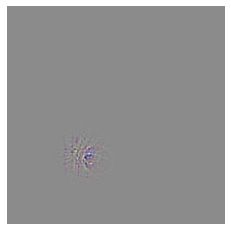

In [11]:
show_result(result)

In [12]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     